# Keck HOBO data

HOBO sensors were strung down various trees in Rivendell. There are also HOBO sensors along the ground surface.

HOBOSensorMap.jpg gives the locations of the sensors. HOBODeviceProperties.xlsx gives the SensorID numbers, Tree Name, Sensor height above the ground, and the date deployed

Holly Maness did a calibration across all the sensors and produced a pickle file HOBOdata.p.

This code combines a lot commands into "def"..  
  (1) treetable = gettable(input_tree)    # gets all the data for the tree..  
  (2) 


In [6]:
#python 3
%pylab inline

import numpy as np
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pickle # works for python 3.x and optimizes speed (works in Python 2.x also, but is relatively slow)
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


/Users/Eren/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod', 'matmul', 'invert', 'add', 'inv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# patience.  this takes close to a minute
# /davidelvins/Downloads/
# or /inez/DATA/KECK_HOBO/HOBO_Holly/
A=pd.read_pickle('/Users/Eren/Desktop/data/HOBO/HOBOdata.p')
df=pd.DataFrame(A).transpose()   # use sensorID as column heads
df.head()

,32,33,34,35,36,37,38,39,40,41,...,797,798,799,800,803,804,807,808,809,810
RH,"[74.9208668514, 74.9390485727, 74.9279375208, ...","[53.6421923707, 53.9179484769, 54.1563310449, ...","[30.8544350231, 30.9190811432, 31.7281677405, ...","[54.3209766321, 53.8331004442, 54.2926939545, ...","[98.9722538285, 99.0813441562, 99.0136677492, ...","[30.8180715805, 31.017060419, 31.2433218395, 3...","[24.9877996208, 23.1433650057, 24.4797215204, ...","[43.5614380121, 42.713967781, 42.4281107185, 3...","[98.483367545, 97.7480179284, 98.5975083508, 9...","[54.6876413447, 55.4270313438, 56.0704622582, ...",...,"[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ..."
T,"[23.8824626467, 23.9749983232, 24.0675339998, ...","[20.2955127109, 20.4548267107, 20.3632450102, ...","[24.990982813, 25.3391840701, 25.5948496506, 2...","[20.4090358604, 20.52255901, 20.4319312856, 20...","[8.24393331216, 8.363180318, 7.95774049813, 8....","[24.9680873879, 25.2924392438, 25.5252093992, ...","[23.9749983232, 24.459618155, 24.644689508, 24...","[23.6525544194, 23.7221946708, 23.8137763713, ...","[8.02928870164, 8.00543930047, 8.07698750398, ...","[20.3403495851, 20.2497218606, 20.1590941362, ...",...,"[5.10054108576, 5.59014848617, 6.00414084404, ...","[6.00414084404, 5.85858188716, 6.12512491209, ...","[5.00224153047, 6.39166793702, 6.60811599627, ...","[5.90678647678, 5.68750285343, 6.17332950171, ...","[5.05139130812, 6.07692032248, 6.80093435473, ...","[5.10054108576, 5.61472337499, 6.07692032248, ...","[5.83400699834, 5.63929826381, 5.9313613656, 6...","[5.05139130812, 6.75272976512, 6.92097323476, ...","[5.12511597459, 6.17332950171, 6.82456405553, ...","[5.14969086341, 5.63929826381, 6.07692032248, ..."
dt,"[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-03 21:15:00, 2012-02-03 21:30:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-03 20:45:00, 2012-02-03 21:00:00, 201...","[2012-02-07 12:00:00, 2012-02-07 12:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 16:15:00, 2012-05-07 16:30:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-07 00:15:00, 2012-02-07 00:30:00, 201...","[2012-02-03 21:00:00, 2012-02-03 21:15:00, 201...",...,"[2010-01-23 12:12:53, 2010-01-23 12:42:53, 201...","[2010-01-23 11:38:12, 2010-01-23 12:08:12, 201...","[2010-01-23 12:16:56, 2010-01-23 12:46:56, 201...","[2010-01-23 11:41:37, 2010-01-23 12:11:37, 201...","[2010-01-23 12:19:04, 2010-01-23 12:49:04, 201...","[2010-01-23 12:14:57, 2010-01-23 12:44:57, 201...","[2010-01-23 11:39:14, 2010-01-23 12:09:14, 201...","[2010-01-23 12:18:04, 2010-01-23 12:48:04, 201...","[2010-01-23 12:20:02, 2010-01-23 12:50:02, 201...","[2010-01-23 12:13:53, 2010-01-23 12:43:53, 201..."


### Construct the dictionary "IDsensor" 

so that the keys are the sensor ID number, the values are a tuple of (tree name, tree specifics). 

For example:
IDsensor['798']=('Kevin','1-1')

In [8]:
IDsensor={'798':('Kevin','1-1'), '807':('Kevin','1-2'), '795':('Kevin','1-3'),  '800':('Kevin','1-4'), 
           '797':('Kevin','2-1'), '810':('Kevin','2-2'), '804':('Kevin','2-3'),  '796':('Kevin','2-4'),
           '799':('S','1'),      '808':('S','2'), '803':('S','3'), '809':('S','4'),
           '40':('ILean','30m'),  '52':('ILean','25m'), '44':('ILean','20m'),
           '45':('ILean','15m'),  '43':('ILean','10m'), '36':('ILean', '5m'),
           '47':('FT','28m'),     '56':('FT','22m'),  '35':('FT','17m'),
           '41':('FT','12m'), '33':('FT','7m'), '49':('FT','2m'),
           '62':('Ursula','25m'), '58':('Ursula','20m'), '54':('Ursula','15m'),
           '61':('Ursula','10m'), '42':('Ursula','5m'),
           '59':('SMM','17.5m'),'32':('SMM', '15m'), '60':('SMM', '10m'), '48':('SMM','5m'),
           '34':('SMM', '2.5m'), '63':('SMU', '17.5m'),'37':('SMU','15m'),'66':('SMU','10m'),
           '65':('SMU', '7.5m'), '64':('SMU','5m'),
           '50':('Freddie', '30m'), '51':('Freddie','24m'), '53':('Freddie','18m'),
           '39':('Freddie','12m'), '46':('Freddie', '6m'),
           '38':('road between well 6 and well 5','N/A'),
           '57':('near well 15, top of ridge','N/A')}

### Create a function that returns a DataFrame for a single tree and a variable (T or RH)

In [9]:
#  First get all the data for a single tree
def get_treetable(tree,param):
    import re
    def extract_number(s):
        return re.match(r'(-?\d+(\.\d+)?)', s).group(0)
    def get_tree_sensorIDs_by_height(input_treename):
        tree_numbers_specs={}
        tree_numbers=[]
        for sensornumber,(treename,treespecs) in IDsensor.items():
            if treename==input_treename: 
                tree_numbers.append(sensornumber)
                tree_numbers_specs[sensornumber]=float(extract_number(treespecs))
        sorted_by_height=sorted(tree_numbers_specs.items(), key=lambda x: x[1])
        ID_sorted_by_height=[item[0] for item in sorted_by_height]
        return ID_sorted_by_height
    def get_tree_table(input_treename):
        dfnew=df[get_tree_sensorIDs_by_height(input_treename)]
        column_ID_names=[IDsensor[x] for x in list(dfnew.columns.values)]
        print (column_ID_names)
        dfnew.columns=column_ID_names
        return dfnew
    ###
    #  Find common time period for all sensors of my tree
    def tree_commontime(input_treename):
        table=get_tree_table(input_treename)
        timestamp=table.ix['dt']
        startdate=max(timestamp.apply(itemgetter(0)))
        enddate=min(timestamp.apply(itemgetter(-1)))
        def mask_by_range(column):
            timemask=(column.ix['dt']>=startdate) & (column.ix['dt']<=enddate)
            return column.apply(itemgetter(timemask))
        return table.apply(mask_by_range)   
    ###
    #  Extract my variable from my tree table for the common time period
    table2=tree_commontime(tree) 
    treeVar=table2.ix[[param]]
    #  create a flat DataFrame with param(sensorID,time)  sensorID is columns, 
    table_expanded=pd.DataFrame(list(zip(*map(lambda a: a.tolist(), treeVar.values[0].tolist()))),\
                                     columns=treeVar.columns)
    #  Use Datetime as index to facilite time averaging etc later.  choose any column, since all 'dt' are same
    #  Careful.  use iloc[2][0], or ix['dt'][0].  Here we choose the first column ([0])
    table_expanded=table_expanded.set_index(pd.DatetimeIndex(table2.ix['dt'][0]))
    return table_expanded
    ###################
def do_anomaly(row):
        return row-np.mean(row)    

In [19]:
#plot variable(time,sensor) for each tree
def plotz(Z,cmin,cmax):    
    fig = plt.figure(figsize=(10,10)) 
    plt.pcolor(Z.transpose(),vmin=cmin,vmax=cmax,cmap='bwr')
    xtickmax=Z.shape[0]
    ytickmax=Z.shape[1]
    xtickrange=range(0,xtickmax)
    ytickrange=range(0,ytickmax)
    timestamp=Z.index
    print(timestamp)
    dateonly=[ts.date() for ts in timestamp]     # drop the hours
    plt.xticks(xtickrange[: : 2000], dateonly[: : 2000])
    #plt.title('Anomalies in '+var+' for tree '+tree)
    sensor_name=Z.columns
    plt.yticks(ytickrange,sensor_name)
    fig.autofmt_xdate()
    cb=plt.colorbar()
    #cb.set_label('Anomaly in '+var)
    return Z.head()

In [ ]:
dftree=get_treetable('Ursula','T')
dftree2=dftree    # make a new copy so as not to muck up original df
dftree2['hour']=[ts.hour for ts in dftree.index]
dfhourmean=dftree.groupby('hour').mean()
anomaly=dfhourmean.apply(do_anomaly,axis=1)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')


AttributeError: 'numpy.int64' object has no attribute 'datetime'

/Users/Eren/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


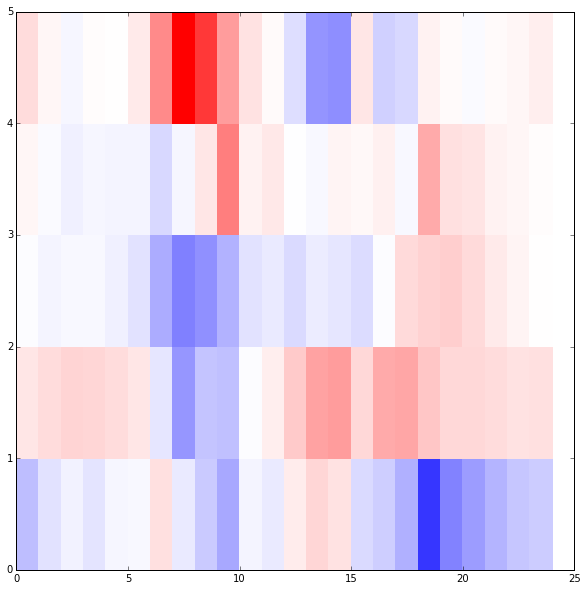

In [20]:
plotz(anomaly,-0.3,0.3)

### Get the dataframe for the tree, and the variable:  dftree    
Do not muck around with dftree  
Careful:  after some manipulations of dftree, dftree.shape changes.    
Temporary remedy:  print (dftree.shape) often.  Re-run the cell that defines dftree

In [11]:
dftree=get_treetable('Ursula','T')
print (dftree.shape)   # note dimensions of dftree... this seems to change
dftree.head()

[('Ursula', '5m'), ('Ursula', '10m'), ('Ursula', '15m'), ('Ursula', '20m'), ('Ursula', '25m')]
(7281, 5)


,"(Ursula, 5m)","(Ursula, 10m)","(Ursula, 15m)","(Ursula, 20m)","(Ursula, 25m)"
2012-05-07 17:00:00,23.813776,24.620840,24.228756,24.367082,24.251651
2012-05-07 17:15:00,23.882463,24.828807,24.321292,24.505409,24.412873
2012-05-07 17:30:00,23.997894,25.060623,24.482514,24.667585,24.597945
2012-05-07 17:45:00,24.090429,25.199904,24.597945,24.828807,24.736271
2012-05-07 18:00:00,24.136220,25.222799,24.690480,24.898447,24.805911


In [12]:
sensorname=dftree.columns
print (sensorname)

Index([ ('Ursula', '5m'), ('Ursula', '10m'), ('Ursula', '15m'),
       ('Ursula', '20m'), ('Ursula', '25m')],
      dtype='object')


### Look at variations averaged over the period  
Start with "dftree" and create new dataframes for each manipulation. Do not muck with "dftree"   
(1) resample the data from 15 minutes to hourly   
(2) Each sensor's average diurnal cycle over the period   
(3) departure of each sensor's mean diurnal cycle from the ensemble mean diurnal cycle   

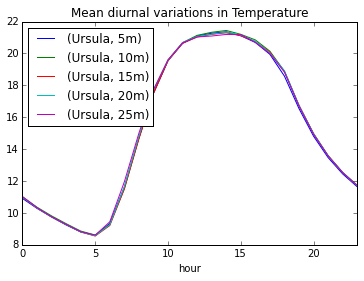

In [13]:
#  Average diurnal cycles for all sensors
dftree2=dftree    # make a new copy so as not to muck up original df
dftree2['hour']=[ts.hour for ts in dftree.index]
dfhourmean=dftree.groupby('hour').mean()
plt.figure(); dfhourmean.plot(); plt.legend(loc='best')
plt.title('Mean diurnal variations in Temperature')

In [14]:
# resample 15 minute data to hourly
dfhour=dftree.resample('H').mean()
print (dfhour.shape)

(6,)


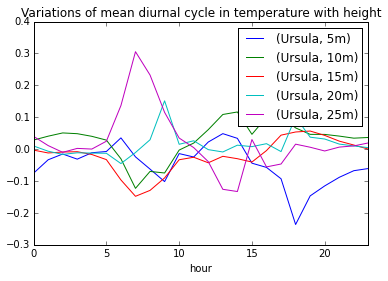

In [15]:
# Each sensor's departure from the all sensor mean
anomaly=dfhourmean.apply(do_anomaly,axis=1)
plt.figure(); anomaly.plot(); plt.legend(loc='best')
plt.title('Variations of mean diurnal cycle in temperature with height')

Index([ ('Ursula', '5m'), ('Ursula', '10m'), ('Ursula', '15m'),
       ('Ursula', '20m'), ('Ursula', '25m'),            'hour'],
      dtype='object')


/Users/Eren/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


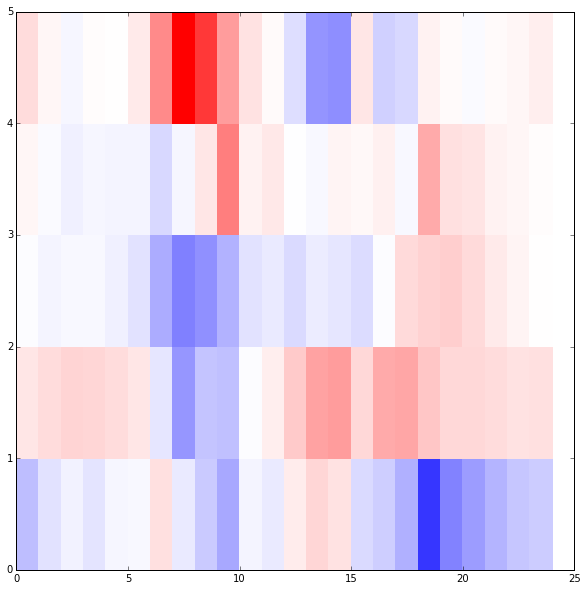

In [22]:
xxx=anomaly.index
print(dfhour.index)

fig = plt.figure(figsize=(10,10)) 
plt.pcolor(anomaly.transpose(),vmin=-0.3,vmax=0.3,cmap='bwr')

AttributeError: 'numpy.int64' object has no attribute 'datetime'

/Users/Eren/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


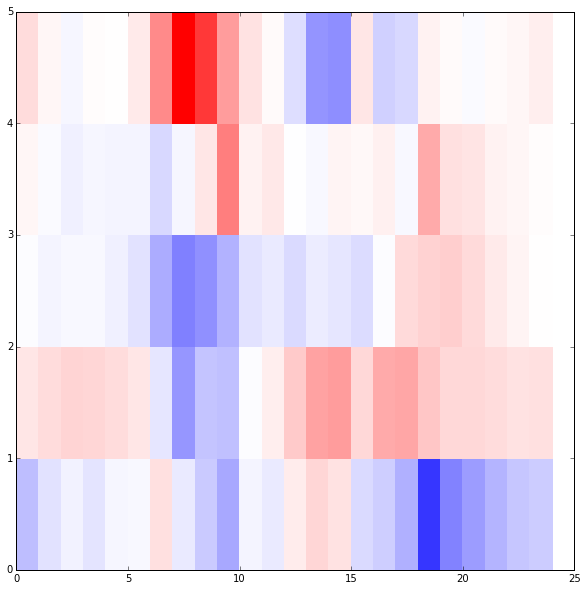

In [17]:
# plot shows up below error messages... need to fix something
plotz(anomaly,-0.3,0.3)
plt.title('Variations of mean diurnal cycle in temperature with height')

###  Variations over the entire period   

In [ ]:
daily=dftree.resample('D').mean()
print (dftree.index[0], dftree.index[-1])
print (dftree.shape)
print (daily.shape)

In [ ]:
plt.figure(); daily.plot(); plt.legend(loc='best')
plt.title('Variations of Daily Temperature')

###  Variations over the entire period   

In [ ]:
tree_anomaly=dftree.apply(do_anomaly,axis=1)
print (tree_anomaly.shape)
plotz(tree_anomaly[tree_anomaly.index.hour==7],-1, 1)

In [ ]:
tree_anomaly_day=tree_anomaly.loc[(tree_anomaly.index.hour>7) & (tree_anomaly.index.hour<19)]
plotz(tree_anomaly_day,-1,1)
plt.title('Daytime variations in temperature')